# Data Exploration & Preparation

## Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

### Data Import 

In [2]:
data = pd.read_csv('raw_data/train.csv')

In [3]:
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


### X & Y

In [4]:
X = data.drop(columns = 'target')

In [5]:
y = data['target']
y

0         0
1         0
2         0
3         0
4         1
         ..
299995    0
299996    0
299997    1
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

### Checking for duplicates

In [6]:
len(X) # Check number of rows before removing duplicates

300000

In [7]:
X = X.drop_duplicates() # Remove duplicates
len(X)# Check new number of rows

300000

### Null Values

In [8]:
X.isnull().sum().sort_values(ascending=False) #NaN count for each column

id        0
cat15     0
cont9     0
cont8     0
cont7     0
cont6     0
cont5     0
cont4     0
cont3     0
cont2     0
cont1     0
cont0     0
cat18     0
cat17     0
cat16     0
cat14     0
cat0      0
cat13     0
cat12     0
cat11     0
cat10     0
cat9      0
cat8      0
cat7      0
cat6      0
cat5      0
cat4      0
cat3      0
cat2      0
cat1      0
cont10    0
dtype: int64

### Checking Cat and Num values

In [9]:
num_cols = X._get_numeric_data().columns

In [10]:
len(num_cols)

12

In [11]:
num_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

In [12]:
num_cols = num_cols.drop('id')

In [13]:
num_cols

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10'],
      dtype='object')

In [14]:
cat_cols = list(set(X) - set(num_cols))

In [15]:
cat_cols 

['cat11',
 'cat12',
 'id',
 'cat14',
 'cat2',
 'cat0',
 'cat4',
 'cat7',
 'cat9',
 'cat17',
 'cat5',
 'cat15',
 'cat1',
 'cat10',
 'cat16',
 'cat6',
 'cat3',
 'cat13',
 'cat18',
 'cat8']

In [16]:
cat_cols.remove('id')

In [17]:
cat_cols

['cat11',
 'cat12',
 'cat14',
 'cat2',
 'cat0',
 'cat4',
 'cat7',
 'cat9',
 'cat17',
 'cat5',
 'cat15',
 'cat1',
 'cat10',
 'cat16',
 'cat6',
 'cat3',
 'cat13',
 'cat18',
 'cat8']

In [18]:
data_cat = data[cat_cols]

In [19]:
# plt.figure(figsize=(18,12))
# sns.countplot(data= data, x='cat7', hue=y)

In [20]:
# plt.figure(figsize=(30,50))
# for index, cat in enumerate(cat_cols):
#     index += 1
#     plt.subplot(10,2,index)
#     x = data[cat]
#     sns.histplot(x)
#     plt.title(cat)

<AxesSubplot:>

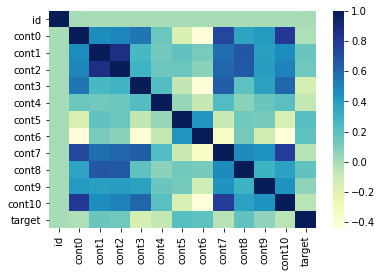

In [21]:
# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

<AxesSubplot:xlabel='target', ylabel='Count'>

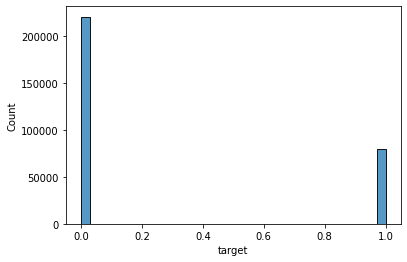

In [22]:
sns.histplot(y) #imbalanced, so i shouldnt use accuracy[[TN,FP], [FN,TP]], F1 identifies 1, & w/o wrong ones

### Correlation features removed 

<AxesSubplot:>

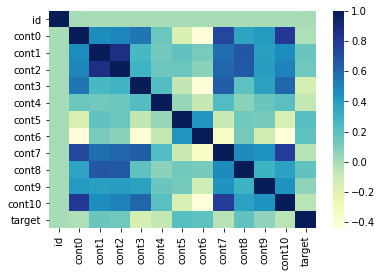

In [23]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [36]:
X = X.drop(columns=['cont2','cont7','cont10','id'])

KeyError: "['cont2' 'cont7' 'cont10' 'id'] not found in axis"

In [25]:
X.shape

(300000, 28)

In [26]:
num_cols = X._get_numeric_data().columns

## Balancing with SMOTE

## Preprocessing

In [27]:
X

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cat17,cat18,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,0,A,I,A,B,B,BI,A,S,Q,...,D,B,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,1,A,I,A,A,E,BI,K,W,AD,...,D,B,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,2,A,K,A,A,E,BI,A,E,BM,...,D,B,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,3,A,K,A,C,E,BI,A,Y,AD,...,D,B,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,4,A,I,G,B,E,BI,C,G,Q,...,D,B,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,D,B,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,499995,A,K,A,A,G,BI,A,K,AE,...,D,B,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,499996,A,G,M,A,H,BI,C,L,F,...,D,D,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,D,A,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
def remove_ID(X):
    return X.drop(columns='id')

X = remove_ID(X)

In [30]:
X[cat_cols]

,cat11,cat12,cat14,cat2,cat0,cat4,cat7,cat9,cat17,cat5,cat15,cat1,cat10,cat16,cat6,cat3,cat13,cat18,cat8
0,A,A,A,A,A,B,S,A,D,BI,B,I,LO,D,A,B,A,B,Q
1,A,B,B,A,A,E,W,F,D,BI,D,I,HJ,B,K,A,A,B,AD
2,A,B,A,A,A,E,E,L,D,BI,B,K,DJ,D,A,A,A,B,BM
3,A,A,A,A,A,E,Y,F,D,BI,B,K,KV,D,A,C,A,B,AD
4,A,A,B,G,A,E,G,A,D,BI,B,I,DP,B,C,B,A,B,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,A,B,F,A,E,AS,A,D,BU,D,N,HG,B,A,A,A,B,K
299996,A,B,B,A,A,G,K,E,D,BI,B,K,HK,D,A,A,A,B,AE
299997,B,A,B,M,A,H,L,A,D,BI,D,G,HC,B,C,A,A,D,F
299998,A,A,A,A,B,B,AA,A,D,BI,B,H,BF,A,A,D,A,A,AX


In [31]:
import sys
sys.setrecursionlimit(1500)

In [32]:
# Encode categorical variables
def one_hot_encoding(X):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X[cat_cols])
    return pd.DataFrame(ohe.transform(X).toarray())

In [33]:
X_cat_ohe = one_hot_encoding(X[cat_cols])

In [34]:
X_cat_ohe

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299996,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299997,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299998,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
new_X = X_cat_ohe.join(X[num_cols])

KeyError: "['id'] not in index"

In [ ]:
new_X

## Baseline Model 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
X = new_X

In [ ]:
from sklearn.model_selection import cross_val_score 

cv_results = cross_validate(model, X, y, cv=5)

In [ ]:
cv_results

In [ ]:
cv_results['test_score'].mean()

### Finding F1 score

In [ ]:
mean_score = cross_val_score(model, X_train, y_train, scoring="f1", cv = 7).mean()

In [ ]:
mean_score

In [ ]:
model.fit(new_data, y)


In [ ]:
cross_val_score(model, X_train, y_train, scoring="f1", cv = 7).mean()

## Feature permutation

In [ ]:
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

In [ ]:
X = X.drop(columns=['WHATEVER COLUMNS']) # Drops weak features

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=10)

scores.mean()

# Modeling

## XGBoost

In [ ]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
!pip install xgboost

In [ ]:
data_test = pd.read_csv('raw_data/test.csv')

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model=SGDClassifier()

In [ ]:
cv_result=cross_validate(model, new_data, y, cv=5) 

In [ ]:
cv_result['test_score'].mean()

In [ ]:
cross_val_score(model, new_data, y, scoring="f1", cv = 7).mean()

## Test Set

In [ ]:
test_enc=ohe.transform(data_test[cat_cols]).toarray()
data_test[cat_cols]=test_enc
model.predict(test)